In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
from scipy.stats.distributions import norm

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Normal Distribution

Recall the probability density function of the normal distribution:

$$
p(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e ^{-(x - \mu)^2/(2\sigma^2)}.
$$

In other words, given some properties of the distribution, the mean $\mu$ and the standard deviation $\sigma$, the function above described the probability *density* as a function of parameter $x\in(-\infty, \infty)$.

So if we want to look at what this distribution looks like a function of $x$, we can just evaluate this function at a bunch of $x$ values and plot it.

In [ ]:
def pdf(x, mu=10, sigma=2.):
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x - mu)**2/(2*sigma**2))

What if we didn't know the function form of the probability density function?  If we had a method of draws samples from the distribution, we can look at the distribution of those samples to get an idea of the shape of the probability density function.

The more samples we have, the better we estimate the distribution.

# Monte Carlo Methods

Monte Carlo methods use randomness to solve problems, typically for optimization, numerical integration, and generating samples from a probability distribution.  The name originates from their first use in solving problems in the Monte Carlo Casino in Monaco.

Generally the process goes like:
1. Define a domain of valid inputs.
1. Generate inputs from some probability distribution randomly over the domain.
1. Perform a deterministic computation of the outputs.
1. Collect the results.

### Coin Flipping
As a simple example, let's make a biased coin and perform some flips to determine its bias.


The fraction of `True` outcomes gives us an estimate of the bias.

### Estimate $\pi$

We can use Monte Carlo methods to estimate $\pi$ using uniform random numbers.  Think about throwing darts at a unit square dart board with a quadrant inscribed on it.

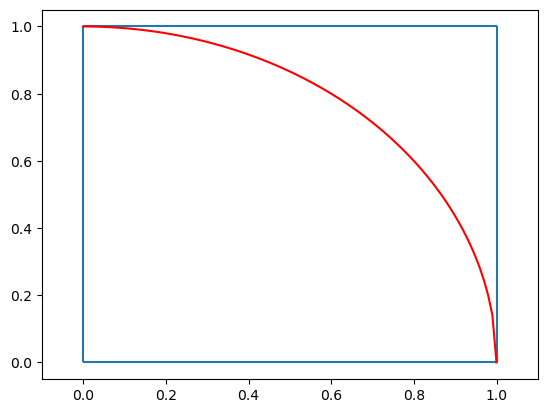

In [37]:
def plot_dart_board(darts=None):
    plt.vlines([0, 1], 0, 1)
    plt.hlines([0, 1], 0, 1)

    xs = np.linspace(0, 1, 100)
    plt.plot(xs, np.sqrt(1-xs**2), color='r')

    if darts is not None:
        inside = np.sum(darts**2, axis=1) < 1.
        plt.scatter(darts[inside, 0], darts[inside, 1], color='r', s=1)
        plt.scatter(darts[~inside, 0], darts[~inside, 1], color='b', s=1)
    plt.xlim(-.1, 1.1)

plot_dart_board()

## Rejection Sampling

Now let's explore ways to generate samples from a distribution when we only know the functional form of its PDF.  Rejection sampling is one approach.

We'll refer to the target distribution that we want to draw samples from as $p(x)$. We can use another distribution $g(x)$ that we *can* draw samples from (whose PDF encompases the whole target distribution after rescaling by some value $k$) to draw samples from the target distribution.

We do so by drawing a sample $z$ from our sampling distribution.  We then generate a random number $u$ unifomly between 0 and $k*g(z)$.  If $u \leq p(z)$ the we save the sample.

In [ ]:
import seaborn as sns

Now let's sample a slightly more complex distribution.  We'll also switch to a normal sampling distribution.

# Importance Sampling

Let's say we are interested in estimating the expectation for some function of our parameter $h(\theta)$ after observing some data $y$, $\mathrm{E}(h(\theta)|y)$, but we can't draw random values of $\theta$ directly from $p(\theta|y)$, but we _can_ draw samples of $\theta$ from some other probability density function $g(\theta)$.

Since we often don't have a normalized posterior density function, we'll use the convention of $q(\theta|y)$ to refer to an unnormalized PDF, where $q(\theta|y) \propto p(\theta|y)$.  In this case:

$$
E(h(\theta)|y) = \int h(\theta) p(\theta|y)d\theta = \frac{\int h(\theta)q(\theta|y) d\theta}{\int q(\theta|y)d\theta}
$$

Putting in some factors of $1$...

$$
E(h(\theta)|y) = \frac{\int \left[ h(\theta)q(\theta|y)/g(\theta)\right] g(\theta)d\theta}{\int \left[q(\theta|y)/g(\theta)\right]g(\theta)d\theta}
$$

Which we can estimate with $S$ draws $\theta^1, \dots, \theta^S$ from $g(\theta)$

$$
E(h(\theta)|y) = \frac{\frac{1}{S}\sum_{s=1}^S h(\theta^s) w(\theta^s)}{\frac{1}{S}\sum_{s=1}^S w(\theta^s)}
$$

where

$$
w(\theta^s) = \frac{q(\theta^s|y)}{g(\theta^s)}
$$

are refered to as the _importance weights_.

Let's estimate the expactation value of $\theta$ (i.e., $h(\theta)=\theta$) from the last example we explored with rejection sampling.

Let's compare that to the mean of the samples we drew using rejection sampling.

# Markov Chain Monte Carlo (MCMC)

# Metropolis algorithm

Here we're going to build a simple Metroplis sampler, and use it to draw samples from a target distribution.

The algorithm works in the following way:
1. The chain is at location $x$
1. A new location $x'$ is drawn from a proposal distribution $q(x)$, which we'll use $q(x)\sim \mathcal{N}(x, \sigma)$.
1. The ratio of the target probability density at the proposed location to the current location is calculated, $\alpha = \frac{p(x')}{p(x)}$.
1. If $\alpha>1$ the jump is accepted, if $\alpha<1$ it's accepted with a probability of $\alpha$.  If a jump is rejected the current sample $x$ is repeated in the chain.

What's left looks like it's fairly uncorrelated, which is what we're looking for.  There are still correlations in the chain that, strictly speaking, should be dealt with (by thinning out the chain), but we'll call this good enough for our purprose, and take a look at the histogram, which gives us an idea of target distribution.